In [7]:
from tensorflow import keras
import matplotlib.pyplot as plt

In [61]:


base_model = keras.applications.VGG16(
    weights='imagenet',  
    input_shape=(224,224, 3),
    include_top=False)

In [62]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [63]:
base_model.trainable = False

In [64]:
inputs = keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)


outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)
model

In [65]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


In [66]:
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=[keras.metrics.BinaryAccuracy()])

In [67]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        samplewise_center=True,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1, 
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=False) 

In [68]:

train_it = datagen.flow_from_directory('data/train/', 
                                       target_size=(224, 224), 
                                       color_mode='rgb', 
                                       class_mode='binary', 
                                       batch_size=8)

valid_it = datagen.flow_from_directory('data/test/', 
                                      target_size=(224 ,224), 
                                      color_mode='rgb', 
                                      class_mode='binary', 
                                      batch_size=8)

Found 85 images belonging to 2 classes.
Found 33 images belonging to 2 classes.


Epoch 1/7
5/5 [==============================] - 26s 6s/step - loss: 4.9827 - binary_accuracy: 0.4500 - val_loss: 2.4677 - val_binary_accuracy: 0.5000
Epoch 2/7
5/5 [==============================] - 23s 5s/step - loss: 1.5047 - binary_accuracy: 0.6486 - val_loss: 1.5503 - val_binary_accuracy: 0.4688
Epoch 3/7
5/5 [==============================] - 23s 5s/step - loss: 2.0455 - binary_accuracy: 0.5500 - val_loss: 1.7161 - val_binary_accuracy: 0.6250
Epoch 4/7
5/5 [==============================] - 24s 5s/step - loss: 1.9367 - binary_accuracy: 0.5250 - val_loss: 1.1258 - val_binary_accuracy: 0.5625
Epoch 5/7
5/5 [==============================] - 24s 6s/step - loss: 0.8384 - binary_accuracy: 0.6757 - val_loss: 1.1168 - val_binary_accuracy: 0.6562
Epoch 6/7
5/5 [==============================] - 25s 6s/step - loss: 1.0714 - binary_accuracy: 0.7027 - val_loss: 1.1522 - val_binary_accuracy: 0.5938
Epoch 7/7
5/5 [==============================] - 24s 5s/step - loss: 0.9089 - binary_accuracy:

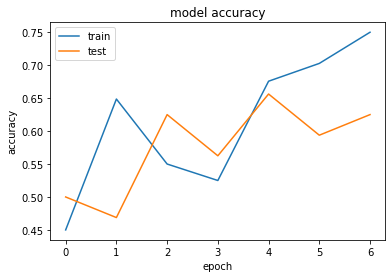

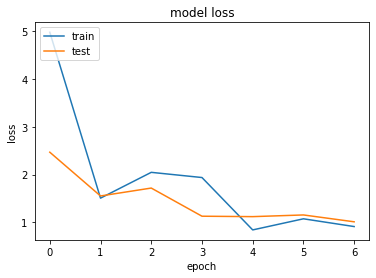

In [69]:
history = model.fit(train_it, steps_per_epoch=5, validation_data=valid_it, validation_steps=4, epochs=7)

print(history.history.keys())

plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()
 
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('model loss')

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

In [70]:
base_model.trainable = True


model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),  # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

Epoch 1/2
6/6 [==============================] - 72s 12s/step - loss: 1.2531 - binary_accuracy: 0.7556 - val_loss: 0.7925 - val_binary_accuracy: 0.6875
Epoch 2/2
6/6 [==============================] - 81s 14s/step - loss: 0.3455 - binary_accuracy: 0.8750 - val_loss: 0.5133 - val_binary_accuracy: 0.8125
dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


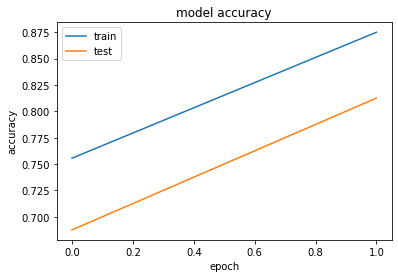

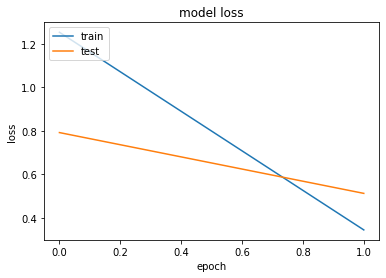

In [71]:
history = model.fit(train_it, steps_per_epoch=6, validation_data=valid_it, validation_steps=4, epochs=2)



print(history.history.keys())

plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('model loss')

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

In [72]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    
    
    ##負的為輪椅
    if preds[0] < 0:
        print('放下斜坡!!!!')
    else:
        print('GET OUT!!!')
    return preds


model.save('./WheelChair-wrong2.h5')


In [8]:
#載入訓練好模組

sv = keras.models.load_model('WheelChair.h5')
sv.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 14,715,201
Trainable params: 14,715,201
Non-trainable params: 0
_________________________________________________________________


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = sv.predict(image)
    
    
    ##負的為輪椅
    if preds[0] < 0:
        print('啟動升降梯')
    else:
        print('GET OUT!!!')
    return preds

啟動升降梯


array([[-2.4106472]], dtype=float32)

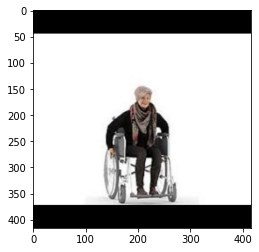

In [10]:
make_predictions('data/img_0214_png.rf.193aac76d41cd8ad0aa711bff8d6ecc3.jpg')

GET OUT!!!


array([[22.128738]], dtype=float32)

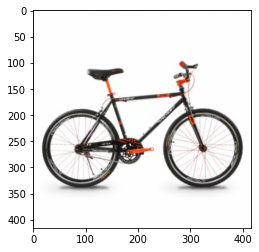

In [11]:
make_predictions('data/bike1_36_png.rf.281557e7fbc0ed9c7591961fd8b0bc84.jpg')

GET OUT!!!
是yaya!!!不能放他進來


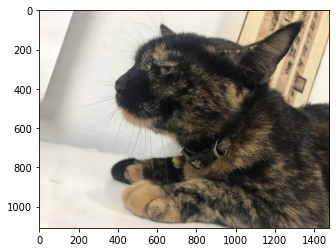

In [13]:
make_predictions('data/S__7594069.jpg')
print('是yaya!!!不能放他進來')

GET OUT!!!


array([[21.180258]], dtype=float32)

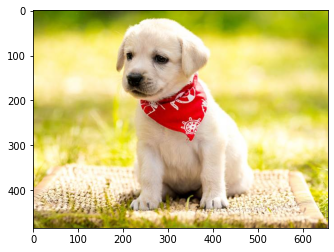

In [14]:
make_predictions('data/20200704002959.jpg')

啟動升降梯


array([[-6.8544393]], dtype=float32)

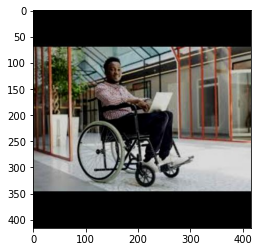

In [15]:
make_predictions('data/img_0267_png.rf.d0c7738c8f745dbe4ab5599f6ca9446a.jpg')

GET OUT!!!


array([[18.531301]], dtype=float32)

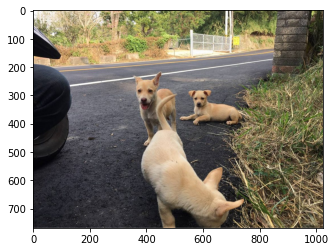

In [16]:
make_predictions('data/dogsss.jpg')



In [ ]:
make_predictions('data/bike1_158_png.rf.f3738e7fc050725724793bc48385dacc.jpg')


In [ ]:
make_predictions('data/dog.jpg')

In [ ]:
make_predictions('data/car.jpg')

In [ ]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)